## Vectorizing Text dalam Natural Language Processing (NLP)

### Apa itu Vectorizing Text?

**Vectorizing text** adalah proses mengubah teks menjadi bentuk numerik yang bisa diproses oleh komputer. Ini penting karena komputer lebih mudah memahami angka daripada kata-kata.

### Mengapa Kita Perlu Vectorizing Text?

Saat kita membangun model untuk mendeteksi spam pada pesan SMS, kita perlu menggunakan kata-kata dalam pesan tersebut. Namun, ada dua tantangan utama:

1. **Panjang Teks yang Beragam**: Teks bisa memiliki panjang yang berbeda-beda, tidak seperti gambar yang bisa diubah ukurannya dengan mudah.
2. **Representasi Numerik Kata**: Kata-kata harus diubah menjadi angka agar bisa diproses oleh komputer. Ini berbeda dengan gambar yang setiap pikselnya sudah berupa angka.

### Bagaimana Cara Vectorizing Text?

Ada beberapa metode untuk mengubah teks menjadi angka:

1. **Count Vectorizer**: Metode paling sederhana, menghitung jumlah kemunculan setiap kata dalam teks.
   - **Contoh**: Jika kita punya dua kalimat "saya suka makan" dan "saya suka minum", maka count vectorizer akan menghasilkan:
     ```
     saya: 2
     suka: 2
     makan: 1
     minum: 1
     ```

2. **TF-IDF (Term Frequency-Inverse Document Frequency)**: Metode ini lebih canggih dan berasal dari bidang pencarian informasi.
   - **Contoh**: TF-IDF tidak hanya menghitung jumlah kata, tetapi juga mempertimbangkan seberapa penting kata tersebut dalam seluruh dokumen.

3. **Word2Vec**: Metode ini menggunakan jaringan saraf (RNN) untuk menghasilkan representasi kata atau "word embeddings".
   - **Contoh**: Word2Vec akan mengubah kata-kata menjadi vektor angka yang memiliki makna semantik. Misalnya, kata "raja" dan "ratu" akan memiliki vektor yang dekat satu sama lain karena mereka memiliki makna yang terkait.

4. **BERT (Bidirectional Encoder Representations from Transformers)**: Metode terbaru yang sangat kuat dalam memahami konteks kata dalam kalimat.
   - **Contoh**: BERT bisa memahami bahwa kata "bank" dalam kalimat "Saya pergi ke bank untuk menyimpan uang" berbeda dengan "Saya duduk di tepi bank sungai".

### Kesimpulan

Vectorizing text adalah langkah penting dalam NLP untuk mengubah teks menjadi bentuk numerik yang bisa diproses oleh komputer. Ada berbagai metode untuk melakukan ini, mulai dari yang sederhana seperti Count Vectorizer hingga yang canggih seperti BERT.

### Apa itu Context-Free Vectorization?

**Context-free vectorization** adalah metode mengubah kalimat menjadi vektor angka tanpa memperhatikan urutan kata dalam kalimat tersebut. Ini berarti posisi kata dalam kalimat tidak mempengaruhi hasil vektor.

### Contoh Context-Free Vectorization

Misalkan kita punya kalimat:
- "Saya suka buah."
- "Buah seperti pisang."

Jika kita menggunakan metode context-free vectorization, kita hanya menghitung jumlah kemunculan setiap kata. Hasilnya bisa berupa vektor seperti ini:
```
(0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0)
```
Setiap angka dalam vektor ini mewakili jumlah kemunculan kata tertentu dalam dokumen.

### Kelebihan dan Kekurangan

**Kelebihan**:
- **Sederhana**: Mudah diterapkan dan cepat dihitung.
- **Perbandingan Dokumen**: Memungkinkan kita membandingkan dokumen berdasarkan kemiripan kata-kata yang ada.

**Kekurangan**:
- **Tidak Memperhatikan Urutan Kata**: Urutan kata dalam kalimat tidak diperhitungkan, sehingga bisa kehilangan makna konteks.
- **Ambiguitas Kata**: Kata dengan banyak makna, seperti "bank" (bisa berarti tempat menyimpan uang atau tepi sungai), akan dianggap sama.

### Mengukur Kemiripan Dokumen

Salah satu cara untuk mengukur kemiripan antara dua dokumen adalah dengan menghitung **cosine similarity**. Ini adalah metode untuk menentukan seberapa mirip dua vektor (dokumen) berdasarkan sudut antara mereka.

### Kesimpulan

Context-free vectorization adalah metode dasar dalam NLP untuk mengubah teks menjadi angka. Meskipun sederhana, metode ini memiliki keterbatasan dalam menangkap makna konteks dan mengatasi ambiguitas kata. Namun, ini tetap berguna untuk membandingkan dokumen dan menemukan kemiripan.

In [287]:
from config import BASE_PATH, \
    DATASET_PATH, \
    NUM_LABEL, \
    MODEL_PATH, \
    INPUT_SHAPE_MODEL_V1, \
    INPUT_SHAPE_MODEL_V2, \
    INPUT_SHAPE_MODEL_V3, \
    INPUT_SHAPE_MODEL_V4, \
    BATCH_SIZE, \
    TRAIN_PROPORTION, \
    OPTIMIZER, \
    LOSS, \
    METRICS, \
    EN_NLP, \
    EN_SW, \
    JP_NLP

from Src import evaluate_model, minmax_scaling_tf, message_length, num_capitals, num_punctuation, word_counts_v1, word_counts_v2, word_counts_no_punct
from Src import DatasetSplitter, SpamLDetectionModel

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity 
from imblearn.over_sampling import SMOTE

import tensorflow as tf
import pandas as pd
import numpy as np

In [125]:
def spacy_tokenizer(text):
    doc = EN_NLP(text)
    return [token.lemma_ for token in doc]

In [138]:
corpus = np.array([
          "The cats are sitting on the mat.",
          "He is running faster than his friends.",
          "She was reading a book under the tree."
])

In [139]:
vectorizer = CountVectorizer(tokenizer=spacy_tokenizer)
corpus_count_vectorizer = vectorizer.fit_transform(corpus)

In [140]:
feature_names = vectorizer.get_feature_names_out()
corpus_count_array = corpus_count_vectorizer.toarray()

In [141]:
print(feature_names)
print(corpus_count_array)

['.' 'a' 'be' 'book' 'cat' 'fast' 'friend' 'he' 'his' 'mat' 'on' 'read'
 'run' 'she' 'sit' 'than' 'the' 'tree' 'under']
[[1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 2 0 0]
 [1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0]
 [1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1]]


In [142]:
count_corpus = ''
for count, corpus_count_vector in enumerate(corpus_count_array):
    count_corpus += f'corpus[{count}] -> '
    for corpus_count_scalar, feature_name in zip(corpus_count_vector, feature_names):
        count_corpus += f'|{feature_name}:{corpus_count_scalar}| ' 
    print(count_corpus)
    count_corpus = ''

corpus[0] -> |.:1| |a:0| |be:1| |book:0| |cat:1| |fast:0| |friend:0| |he:0| |his:0| |mat:1| |on:1| |read:0| |run:0| |she:0| |sit:1| |than:0| |the:2| |tree:0| |under:0| 
corpus[1] -> |.:1| |a:0| |be:1| |book:0| |cat:0| |fast:1| |friend:1| |he:1| |his:1| |mat:0| |on:0| |read:0| |run:1| |she:0| |sit:0| |than:1| |the:0| |tree:0| |under:0| 
corpus[2] -> |.:1| |a:1| |be:1| |book:1| |cat:0| |fast:0| |friend:0| |he:0| |his:0| |mat:0| |on:0| |read:1| |run:0| |she:1| |sit:0| |than:0| |the:1| |tree:1| |under:1| 


In [143]:
cosine_similarity(corpus_count_array) 

array([[1.        , 0.2236068 , 0.42163702],
       [0.2236068 , 1.        , 0.23570226],
       [0.42163702, 0.23570226, 1.        ]])

---
##### Hal ini menunjukkan bahwa kalimat pertama dan kalimat kedua memiliki 0.223 skor kemiripan (pada skala 0 sampai 1). Kalimat pertama dan ketiga kalimat pertama dan ketiga tidak memiliki kesamaan. Kalimat kedua dan ketiga memiliki skor kemiripan 0.235 - yang tertinggi dalam set ini. Kasus penggunaan lain dari teknik ini adalah untuk memeriksa kesamaan dokumen dengan kata kunci yang diberikan. Katakanlah kueri tersebut adalah apel dan pisang.  Langkah pertama adalah menghitung vektor kueri ini, dan kemudian menghitung skor kemiripan kosinus terhadap dokumen-dokumen di dalam korpus
---

In [147]:
query = vectorizer.transform(["cat"])
cosine_similarity(corpus_count_array, query)

array([[0.31622777],
       [0.        ],
       [0.        ]])

---
##### Hal ini menunjukkan bahwa kueri ini paling cocok dengan kalimat kedua dalam korpus. Kalimat ketiga akan berada di peringkat kedua, dan kalimat pertama akan berada di peringkat terendah. Dalam beberapa baris, mesin pencari dasar telah diimplementasikan, bersama dengan logika untuk melayani kueri! Dalam skala besar, ini adalah masalah yang sangat sulit, karena jumlah kata atau kolom dalam web crawler akan mencapai 3 miliar. Setiap halaman web akan direpresentasikan sebagai sebuah baris, sehingga membutuhkan miliaran baris. Menghitung kemiripan kosinus dalam milidetik untuk melayani kueri online dan menjaga agar konten matriks ini tetap diperbarui adalah pekerjaan yang sangat besar. Langkah selanjutnya dari skema vektorisasi yang cukup sederhana ini adalah mempertimbangkan konten informasi dari setiap kata dalam membangun matriks ini.
---

## TF-IDF (Term Frequency-Inverse Document Frequency)

**TF-IDF** adalah metode yang digunakan dalam Natural Language Processing (NLP) untuk menilai pentingnya sebuah kata dalam sebuah dokumen relatif terhadap kumpulan dokumen lainnya (corpus). Mari kita bahas konsep ini dengan cara yang mudah dipahami.

#### 1. **Term Frequency (TF)**
**Term Frequency** mengukur seberapa sering sebuah kata muncul dalam sebuah dokumen. Semakin sering kata tersebut muncul, semakin tinggi nilai TF-nya. Misalnya, jika kita memiliki dokumen tentang resep buah-buahan, kata "apel" mungkin muncul berkali-kali.

**Rumus TF:**
$$
TF(t,d) = \frac{\text{Jumlah kemunculan t dalam d}}{\text{Total jumlah kata dalam d}}
$$

Contoh:
Jika kata "apel" muncul 3 kali dalam dokumen yang memiliki total 100 kata, maka:
$$
TF(\text{apel}, d) = \frac{3}{100} = 0.03
$$

#### 2. **Inverse Document Frequency (IDF)**
**Inverse Document Frequency** mengukur seberapa penting sebuah kata dengan melihat seberapa jarang kata tersebut muncul di seluruh dokumen dalam corpus. Kata yang jarang muncul di banyak dokumen akan memiliki nilai IDF yang tinggi.

**Rumus IDF:**
$$
IDF(t) = \log \left( \frac{N}{1 + n_t} \right)
$$
Di mana:
- \( N \) adalah total jumlah dokumen dalam corpus.
- \( n_t \) adalah jumlah dokumen yang mengandung kata \( t \).

Contoh:
Jika kita memiliki 10.000 dokumen dan kata "tuile" hanya muncul di 10 dokumen, maka:
$$
IDF(\text{tuile}) = \log \left( \frac{10000}{1 + 10} \right) = \log(909.09) \approx 2.96
$$

#### 3. **Menggabungkan TF dan IDF**
Untuk mendapatkan skor TF-IDF, kita mengalikan nilai TF dengan IDF.

**Rumus TF-IDF:**
$$
TF\text{-}IDF(t,d) = TF(t,d) \times IDF(t)
$$

Contoh:
Jika \( TF(\text{tuile}, d) = 0.01 \) dan \( IDF(\text{tuile}) = 2.96 \), maka:
$$
TF\text{-}IDF(\text{tuile}, d) = 0.01 \times 2.96 = 0.0296
$$

#### Mengapa Ini Penting?
Dengan menggunakan TF-IDF, kita bisa menilai kata-kata yang lebih spesifik dan informatif dalam konteks tertentu. Kata-kata umum seperti "apel" mungkin tidak membantu banyak dalam mengidentifikasi topik spesifik, tetapi kata-kata seperti "tuile" bisa sangat berguna karena lebih jarang dan lebih spesifik.

#### Contoh Praktis
Bayangkan kamu mencari resep kue tertentu di internet. Kata "kue" akan muncul di hampir semua resep, tetapi kata "tuile" hanya akan muncul di resep-resep tertentu yang benar-benar relevan dengan pencarianmu.

In [148]:
transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(corpus_count_array)

In [149]:
corpus

array(['The cats are sitting on the mat.',
       'He is running faster than his friends.',
       'She was reading a book under the tree.'], dtype='<U38')

In [150]:
pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names_out())

,.,a,be,book,cat,fast,friend,he,his,mat,on,read,run,she,sit,than,the,tree,under
0,0.190630,0.000000,0.190630,0.000000,0.400059,0.000000,0.000000,0.000000,0.000000,0.400059,0.400059,0.000000,0.000000,0.000000,0.400059,0.000000,0.535848,0.000000,0.000000
1,0.187564,0.000000,0.187564,0.000000,0.000000,0.393624,0.393624,0.393624,0.393624,0.000000,0.000000,0.000000,0.393624,0.000000,0.000000,0.393624,0.000000,0.000000,0.000000
2,0.181368,0.380621,0.181368,0.380621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.380621,0.000000,0.380621,0.000000,0.000000,0.254906,0.380621,0.380621


### Modeling using TF-IDF features

In [151]:
df = pd.read_csv(DATASET_PATH, sep='\t', names=['label', 'message'])

In [193]:
df.shape

(5572, 2)

In [152]:
df[:5]

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [162]:
vectorizer = CountVectorizer(tokenizer=spacy_tokenizer)
tfidf = TfidfTransformer(smooth_idf=False)
lb = LabelBinarizer()

In [178]:
df_copy = df.copy(deep=True)

In [179]:
corpus_count_vector = vectorizer.fit_transform(df_copy['message'])

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [201]:
vectorizer_df = pd.DataFrame(
    data=corpus_count_vector.toarray(), 
    columns=vectorizer.get_feature_names_out()
)

In [212]:
print(f'orig df {df_copy.shape} | vectorized df: {vectorizer_df.shape}')

orig df (5572, 2) | vectorized df: (5572, 8444)


In [218]:
concat_orig_and_vectorized_df = pd.concat([df_copy['label'], vectorizer_df], axis=1)

In [219]:
concat_orig_and_vectorized_df.shape

(5572, 8445)

In [220]:
concat_orig_and_vectorized_df[:5]

,label,\t,\n,,!,!!!;-,!gud,!鈥,"""",""":-",...,é,ú1.20,ü,ü'll,ü.,–,—,’m,…,┾
0,ham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,spam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [241]:
index_slice = slice(40, 70)

In [242]:
print('Spam dataframe statistic')
concat_orig_and_vectorized_df[concat_orig_and_vectorized_df['label'] == 'spam'].iloc[:, index_slice].describe()

Spam dataframe statistic


,-msg,-no,-pls,-shakespeare-,-sub,-the,-tho,-u,-via,-vivekanand-,...,...........,...............,................,..................,.@,.after,.be,.by,.call,.dont
count,747.000000,747.0,747.000000,747.0,747.000000,747.0,747.0,747.0,747.0,747.0,...,747.0,747.0,747.0,747.0,747.0,747.0,747.0,747.0,747.0,747.0
mean,0.001339,0.0,0.001339,0.0,0.002677,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.036588,0.0,0.036588,0.0,0.051709,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [243]:
print('Ham dataframe statistic')
concat_orig_and_vectorized_df[concat_orig_and_vectorized_df['label'] == 'ham'].iloc[:, index_slice].describe()

Ham dataframe statistic


,-msg,-no,-pls,-shakespeare-,-sub,-the,-tho,-u,-via,-vivekanand-,...,...........,...............,................,..................,.@,.after,.be,.by,.call,.dont
count,4825.0,4825.000000,4825.0,4825.000000,4825.0,4825.000000,4825.000000,4825.000000,4825.000000,4825.000000,...,4825.000000,4825.000000,4825.000000,4825.000000,4825.000000,4825.000000,4825.000000,4825.000000,4825.000000,4825.000000
mean,0.0,0.000207,0.0,0.000207,0.0,0.000207,0.000207,0.000207,0.000207,0.000207,...,0.000622,0.000207,0.000207,0.000207,0.000622,0.000207,0.000415,0.000207,0.000207,0.000207
std,0.0,0.014396,0.0,0.014396,0.0,0.014396,0.014396,0.014396,0.014396,0.014396,...,0.024930,0.014396,0.014396,0.014396,0.024930,0.014396,0.020357,0.014396,0.014396,0.014396
min,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [244]:
tfidf = transformer.fit_transform(corpus_count_vector)

In [247]:
tfidf_df = pd.DataFrame(
    data=tfidf.toarray(), 
    columns=vectorizer.get_feature_names_out()
)

In [249]:
concat_orig_and_tfidf_df = pd.concat([df_copy['label'], tfidf_df], axis=1)

In [252]:
concat_orig_and_tfidf_df[:5]

,label,\t,\n,,!,!!!;-,!gud,!鈥,"""",""":-",...,é,ú1.20,ü,ü'll,ü.,–,—,’m,…,┾
0,ham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,spam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [250]:
print('Spam dataframe statistic')
concat_orig_and_vectorized_df[concat_orig_and_tfidf_df['label'] == 'spam'].iloc[:, index_slice].describe()

Spam dataframe statistic


,-msg,-no,-pls,-shakespeare-,-sub,-the,-tho,-u,-via,-vivekanand-,...,...........,...............,................,..................,.@,.after,.be,.by,.call,.dont
count,747.000000,747.0,747.000000,747.0,747.000000,747.0,747.0,747.0,747.0,747.0,...,747.0,747.0,747.0,747.0,747.0,747.0,747.0,747.0,747.0,747.0
mean,0.001339,0.0,0.001339,0.0,0.002677,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.036588,0.0,0.036588,0.0,0.051709,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [251]:
print('Ham dataframe statistic')
concat_orig_and_vectorized_df[concat_orig_and_tfidf_df['label'] == 'ham'].iloc[:, index_slice].describe()

Ham dataframe statistic


,-msg,-no,-pls,-shakespeare-,-sub,-the,-tho,-u,-via,-vivekanand-,...,...........,...............,................,..................,.@,.after,.be,.by,.call,.dont
count,4825.0,4825.000000,4825.0,4825.000000,4825.0,4825.000000,4825.000000,4825.000000,4825.000000,4825.000000,...,4825.000000,4825.000000,4825.000000,4825.000000,4825.000000,4825.000000,4825.000000,4825.000000,4825.000000,4825.000000
mean,0.0,0.000207,0.0,0.000207,0.0,0.000207,0.000207,0.000207,0.000207,0.000207,...,0.000622,0.000207,0.000207,0.000207,0.000622,0.000207,0.000415,0.000207,0.000207,0.000207
std,0.0,0.014396,0.0,0.014396,0.0,0.014396,0.014396,0.014396,0.014396,0.014396,...,0.024930,0.014396,0.014396,0.014396,0.024930,0.014396,0.020357,0.014396,0.014396,0.014396
min,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.0,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [253]:
concat_orig_and_vectorized_df_copy = concat_orig_and_vectorized_df.copy(deep=True)
concat_orig_and_vectorized_df_copy['label'] = lb.fit_transform(concat_orig_and_vectorized_df_copy['label'])

In [254]:
concat_orig_and_vectorized_df_copy[:5]

,label,\t,\n,,!,!!!;-,!gud,!鈥,"""",""":-",...,é,ú1.20,ü,ü'll,ü.,–,—,’m,…,┾
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [256]:
X = concat_orig_and_vectorized_df_copy.drop(columns=['label', 'message'])
y = concat_orig_and_vectorized_df_copy['label']

# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)

In [275]:
SMSSpamCollection_tf_data = tf.data.Dataset.from_tensor_slices((X, y))

In [276]:
print(f'info train data: {SMSSpamCollection_tf_data}')
print(f'number of train data: {len(SMSSpamCollection_tf_data)}')

info train data: <_TensorSliceDataset element_spec=(TensorSpec(shape=(8443,), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>
number of train data: 5572


In [277]:
SMSSpamCollection_tf_data_scaled = SMSSpamCollection_tf_data.map( 
    map_func=lambda features, label: minmax_scaling_tf(features, label, feature_range=(0, 1)),
    num_parallel_calls=tf.data.AUTOTUNE
)
SMSSpamCollection_tf_data_cached = SMSSpamCollection_tf_data_scaled.cache()

In [278]:
print(f'info train data: {SMSSpamCollection_tf_data_cached}')
print(f'number of train data: {len(SMSSpamCollection_tf_data_cached)}')

info train data: <CacheDataset element_spec=(TensorSpec(shape=(8443,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>
number of train data: 5572


In [279]:
splitter = DatasetSplitter(batch_size=BATCH_SIZE, train_split=TRAIN_PROPORTION)

In [280]:
SMSSpamCollection_tf_data_train, SMSSpamCollection_tf_data_valid = splitter.split_and_prepare(SMSSpamCollection_tf_data_cached)

=================================== Training Dataset ===================================
Info data: <_TakeDataset element_spec=(TensorSpec(shape=(8443,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>
Training Split: 0.8
Number of data: 4457
AFTER BATCH: 32
Number of data: 140
=================================== Validation Dataset ===================================
Info data: <_SkipDataset element_spec=(TensorSpec(shape=(8443,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>
Validation Split: 0.2
Number of data: 1115
AFTER BATCH: 32
Number of data: 35


In [290]:
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=0.001)

my_model=SpamLDetectionModel(
    input_shape=(8443, ), 
    num_classes=NUM_LABEL, 
    optimizer=OPTIMIZER,
    loss=LOSS,
    metrics=METRICS
)
my_model.model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 8443)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 12)             │       101,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,341 (395.86 KB)

 Trainable params: 101,341 (395.86 KB)

 Non-trainable params: 0 (0.00 B)

In [291]:
history = my_model.train(
    SMSSpamCollection_tf_data_train,
    validation_data=SMSSpamCollection_tf_data_valid,
    epochs=30,
)

Epoch 1/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8537 - loss: 0.5241 - val_accuracy: 0.9525 - val_loss: 0.2058
Epoch 2/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9667 - loss: 0.1703 - val_accuracy: 0.9839 - val_loss: 0.1118
Epoch 3/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9905 - loss: 0.0866 - val_accuracy: 0.9937 - val_loss: 0.0578
Epoch 4/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9882 - loss: 0.0621 - val_accuracy: 0.9910 - val_loss: 0.0434
Epoch 5/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9918 - loss: 0.0454 - val_accuracy: 0.9919 - val_loss: 0.0413
Epoch 6/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9925 - loss: 0.0349 - val_accuracy: 0.9937 - val_loss: 0.0274
Epoch 7/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9937 - loss: 0.0298 - val_accuracy: 0.9937 - val_loss: 0.0243
Epoch 8/30
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9960 - loss: 0.0232 - val_accuracy:

## Word Vectors dan Word2Vec

#### Apa itu Word Vectors?
Word vectors atau vektor kata adalah representasi dari kata-kata dalam bentuk angka-angka di ruang multidimensi. Bayangkan kamu punya peta, di mana setiap kata adalah titik di peta tersebut. Kata-kata yang sering muncul bersama dalam kalimat akan berada lebih dekat satu sama lain di peta ini.

#### Mengapa Word Vectors Penting?
Dalam pemrosesan bahasa alami (NLP), kita ingin komputer memahami hubungan antara kata-kata. Misalnya, kata "bake" (memanggang) dan "oven" (oven) sering muncul bersama dalam konteks memasak. Jadi, di peta kita, mereka akan berada dekat satu sama lain. Sebaliknya, kata "bake" dan "astronomy" (astronomi) jarang muncul bersama, jadi mereka akan berada jauh satu sama lain.

#### Bagaimana Cara Kerja Word2Vec?
Word2Vec adalah algoritma yang dibuat oleh Tomas Mikolov dan timnya di Google pada tahun 2013. Algoritma ini membantu kita membuat peta kata-kata tersebut. Ada dua metode utama dalam Word2Vec:

1. **Continuous Bag-of-Words (CBOW)**: Metode ini mencoba memprediksi kata tengah dari kata-kata di sekitarnya. Misalnya, jika kita punya kalimat "The cat sits on the mat", CBOW akan mencoba memprediksi kata "sits" dari kata-kata "The", "cat", "on", dan "the".

2. **Continuous Skip-Gram**: Metode ini kebalikan dari CBOW. Skip-Gram mencoba memprediksi kata-kata di sekitar dari kata tengah. Jadi, dari kata "sits", Skip-Gram akan mencoba memprediksi "The", "cat", "on", dan "the".

#### Contoh Sederhana
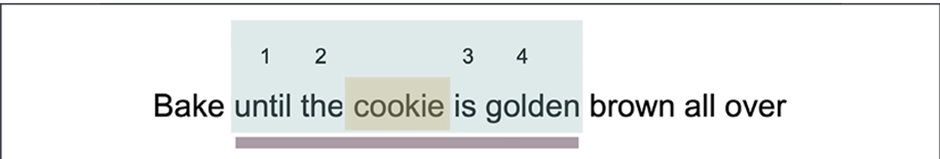

Bayangkan kamu sedang membaca resep: "Bake until the cookie is golden brown all over." Jika kita fokus pada kata "cookie", kita bisa menggunakan Skip-Gram untuk memprediksi kata-kata di sekitarnya seperti "bake", "until", "is", dan "golden". Algoritma ini akan belajar bahwa "cookie" sering muncul bersama kata-kata tersebut, sehingga mereka akan berada dekat satu sama lain di peta.

#### Mengapa Ini Penting?
Dengan menggunakan Word2Vec, kita bisa membuat komputer memahami konteks dan hubungan antara kata-kata tanpa perlu data pelatihan yang diawasi. Ini sangat berguna untuk berbagai aplikasi NLP seperti penerjemahan otomatis, analisis sentimen, dan banyak lagi.

#### Kesimpulan
Word vectors dan Word2Vec membantu kita membuat representasi kata-kata dalam bentuk angka yang bisa dipahami oleh komputer. Dengan cara ini, kita bisa membuat komputer memahami hubungan antara kata-kata dengan lebih baik, yang sangat penting untuk berbagai aplikasi dalam pemrosesan bahasa alami.